In [1]:
%run "../../../common/0_notebooks_base_setup.py"    

/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


## Imports

In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import datetime


---

## Test de Hipótesis

### Data

El dataset que usamos en esta parte contiene reportes de  [Federal Aviation Administration Wildlife Strike Database](http://wildlife.faa.gov/database.aspx) correspondientes a los años 2012 y 2013 en el estado de California, USA.

Usaremos los datos diarios de frecuencia de incidentes de golpes a fauna silvestre.

### Leemos los datos

In [3]:
# Load the data from a csv file. 
data_location = "../Data/wildlife.csv"
data = pd.read_csv(data_location)
data.head()


,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPID,OPERATOR,ATYPE,TYPE_ENG,SPECIES_ID,SPECIES,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,12/31/2013 0:00,CA,KHWD,HAYWARD EXECUTIVE ARPT,UNK,UNKNOWN,UNKNOWN,NaN,YI005,Barn swallow,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Carcass Found,NaN,NaN,4/24/2014 0:00,False,False
1,12/31/2013 0:00,CA,KSMF,SACRAMENTO INTL,PCM,WESTAIR,C-208,C,J2104,Northern pintail,...,Deleted,Deleted,NaN,Multiple,Airport Operations,NaN,NaN,4/24/2014 0:00,False,True
2,12/31/2013 0:00,CA,KSNA,JOHN WAYNE-ORANGE COUNTY ARPT,BUS,BUSINESS,C-650,D,H4105,Double-crested cormorant,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Pilot,NaN,NaN,4/24/2014 0:00,False,True
3,12/30/2013 0:00,CA,KSMF,SACRAMENTO INTL,UNK,UNKNOWN,UNKNOWN,NaN,1A1,Virginia opossum,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Carcass Found,NaN,NaN,4/24/2014 0:00,False,False
4,12/30/2013 0:00,CA,KMER,CASTLE ARPT,BUS,BUSINESS,PA-44 SEMINOLE,A,K33,Hawks,...,Deleted,Deleted,NaN,Multiple,Tower,NaN,NaN,4/24/2014 0:00,False,True


### Ejercicio: Preparación de los datos

Construyamos un dataset que tenga como columnas

* la fecha del incidente, de tipo datetime

Ayuda: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

* la cantidad de incidentes en esa fecha, de tipo int 

Ayuda: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html


In [4]:
data.INCIDENT_DATE = pd.to_datetime(data.INCIDENT_DATE)
data_fecha = data[['INCIDENT_DATE']]
data_fecha_count = data_fecha.groupby('INCIDENT_DATE')['INCIDENT_DATE'].size()
data_fecha_count.name = "INCIDENT_COUNT"
data_fecha_count = data_fecha_count.reset_index()
data_fecha_count.dtypes

INCIDENT_DATE     datetime64[ns]
INCIDENT_COUNT             int64
dtype: object

### Ejercicio: Preparación de los datos - continuación

Queremos que el DataFrame que creamos en el paso anterior tenga un registro por cada día del año 2012 y 2013.

Para eso vamos a: 

1) Asignar el valor del campo INCIDENT_DATE como índice del DataFrame construído en el punto anterior 

2) Crear un nuevo DataFrame que tenga sólo un índice y ninguna columna, que sea todas las fechas existentes durante los años 2012 y 2013 

Ayuda: `pandas.date_range` https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

3) Hacer un join entre los DataFrame 1) y 2). Con esto vamos a conseguir que en el DataFrame resultado haya valores null en el campo INCIDENT_COUNT para las fechas que no estaban en el DataFrame resultado del ejercicio anterior.

Ayuda: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

4) Por último, completamos los valores nulos de INCIDENT_COUNT en el nuevo DataFrame con el valor cero

Ayuda: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html


In [5]:
data_fecha_count.index = data_fecha_count.INCIDENT_DATE
data_fecha_count = data_fecha_count.drop(['INCIDENT_DATE'], axis=1)
data_fecha_count.head()

,INCIDENT_COUNT
INCIDENT_DATE,
2012-01-02,1
2012-01-04,2
2012-01-05,5
2012-01-06,3
2012-01-07,2


In [6]:
date_from = datetime.date(day=1, month=1, year=2012)
date_to = datetime.date(day=31, month=12, year=2013)
fechas_2012_2013 = pd.date_range(date_from, date_to, freq='D')

dates_df = pd.DataFrame(index = fechas_2012_2013)
dates_df

""
2012-01-01
2012-01-02
2012-01-03
2012-01-04
2012-01-05
...
2013-12-27
2013-12-28
2013-12-29
2013-12-30


In [7]:
data_2012_2013 = data_fecha_count.join(dates_df, how='right')
data_2012_2013.shape

(731, 1)

In [8]:
data_2012_2013.head()

,INCIDENT_COUNT
2012-01-01,NaN
2012-01-02,1.0
2012-01-03,NaN
2012-01-04,2.0
2012-01-05,5.0


In [9]:
data_2012_2013.fillna(value = 0, axis= 1, inplace=True)
data_2012_2013.head()

,INCIDENT_COUNT
2012-01-01,0.0
2012-01-02,1.0
2012-01-03,0.0
2012-01-04,2.0
2012-01-05,5.0


### Ejercicio: Exploratorio

Usemos un gráficos de barras para representar los valores de frecuencia de accidentes en los años 2012 y 2013 (por separado)

Para eso, agregamos al DataFrame una columna de tipo int que indique el mes que corresponde al valor de index de cada registro.

Y usemos los valores de esta nueva columna como eje x.

In [10]:
data_2012_2013["plot_month"] = [x.month for x in data_2012_2013.index]
data_2012_2013.head(3)

,INCIDENT_COUNT,plot_month
2012-01-01,0.0,1
2012-01-02,1.0,1
2012-01-03,0.0,1


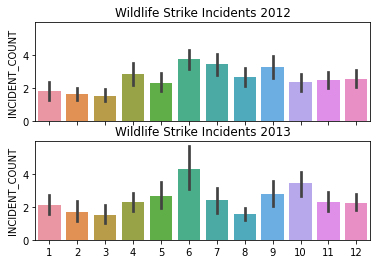

In [11]:
# magia!
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-label
data_2012 = data_2012_2013['2012']
data_2013 = data_2012_2013['2013']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
sns.barplot(x=data_2012.plot_month, y= data_2012.INCIDENT_COUNT, ax=ax1)
sns.barplot(x=data_2013.plot_month, y = data_2013.INCIDENT_COUNT, ax=ax2)
ax1.set_title('Wildlife Strike Incidents 2012')
ax2.set_title('Wildlife Strike Incidents 2013')
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.show()

In [12]:
data_2012

,INCIDENT_COUNT,plot_month
2012-01-01,0.0,1
2012-01-02,1.0,1
2012-01-03,0.0,1
2012-01-04,2.0,1
2012-01-05,5.0,1
...,...,...
2012-12-27,1.0,12
2012-12-28,1.0,12
2012-12-29,0.0,12
2012-12-30,4.0,12


### Ejercicio: Test de hipótesis

Asumamos que la Federal Aviation Administration lanzó en el 2013 un nuevo programa de prevención de incidentes con fauna silvestre.

Queremos saber si hay una baja significativa en el número diario de incidentes del año 2013 respecto del 2012.

Elegimos como nivel de significación (alfa) 0.05

Una probabilidad menor a 0.05 rechaza la hipótesis nula.

La hipótesis nula es que la media de incidentes del 2012 es la media poblacional y es igual a la media poblacional de incidentes del 2013.

La hipótesis alternativa es que la media de incidentes del 2013 es menor que la del 2012.

|Hypothesis|$\alpha = .05$|   |
|---|:---:|:---|
|Null|$H_0:$|$\mu = \bar{x}_{2013}$|
|Alternative|$H_a:$|$\mu \gt \bar{x}_{2013} $|

Calculemos la media de incidentes y desvío para los años 2012 y 2013

In [13]:
xbar_2012 = data_2012.INCIDENT_COUNT.mean()
sd_2012 = data_2012.INCIDENT_COUNT.std()
print(xbar_2012, sd_2012)

xbar_2013 = data_2013.INCIDENT_COUNT.mean()
sd_2013 = data_2013.INCIDENT_COUNT.std()
print(xbar_2013, sd_2013)

2.5546448087431695 1.6818182461905782
2.4328767123287673 2.0752369647905557


Notamos que la media de incidentes del 2013 es un poco menor que la del 2102.

Queremos saber si esta diferencia se debe a la variación normal de estos dato, es decir que la diferencia se puede adjudicar al azar. 

Para eso, calculemos el z-score y usemos un nivel de significación 0.05



In [14]:
mu = xbar_2012
sigma = sd_2012
n = data_2013.shape[0]
se = sigma / math.sqrt(n)
zscore = (xbar_2013 - mu) / se
zscore

-1.3832506697924576

Calculamos valores críticos:

In [15]:
alpha = .05
critical_value = stats.norm.ppf(alpha)
critical_value

-1.6448536269514729

Grafiquemos datos con distribución normal, la región de rechazo, y el valor de zscore obtenido

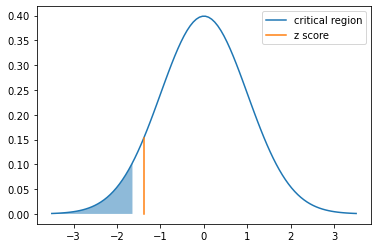

In [16]:
# Plot the normal distribution
samples = 100
x_plot = np.linspace(-3.5, 3.5, samples)
y_plot = stats.norm.pdf(x_plot, 0, 1)
plt.plot(x_plot, y_plot)

# Plot the critical region
x_crit = np.linspace(-3.5, critical_value, samples)
y_crit = stats.norm.pdf(x_crit, 0, 1)
# colorea la region de rechazo de H0:
plt.fill_between(x_crit,  y_crit, alpha=.5)

# Plot the z score, linea naranja:
plt.plot([zscore, zscore], [0, stats.norm.pdf(zscore)])

# Show legend
plt.legend(['critical region', 'z score'])
plt.show()

Como zscore no es menor que critical_value, no podemos rechazar H0.

Esto indica que podemos obtener por azar una media muestral con ese valor de la misma población real.

En otras palabras, no hay diferencia significativa en los promedios de incidentes en 2012 y 2013.


---

## A/B Testing

### Dataset

Los datos corresponden a las visitas de usuarios a un sitio web.

Este sitio tiene dos versiones de la landing: old_page y new_page

El campo "converted" indica si un usuario hizo click o no, idicados con 1 o 0 respectivamente, en la pagina que vio.

El objetivo es determinar si la nueva versión de la página tiene más proporción de clicks que la vieja.

https://www.kaggle.com/zhangluyuan/ab-testing

In [17]:
data_location = "../Data/ab_data.csv"
data = pd.read_csv(data_location, sep=",")
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [18]:
data.shape

(294478, 5)

Tenemos que eliminar todos los registros que sean 
* 'control' y 'new_page' 
* 'treatment' y 'old_page'

Miremos cuántos no están en esas condiciones

In [19]:
control_mask = data.group == 'control'
treatment_mask = data.group == 'treatment'
new_mask = data.landing_page == 'new_page'
old_mask = data.landing_page == 'old_page'
control_new_mask = np.logical_and(control_mask, new_mask)
treatment_old_mask = np.logical_and(treatment_mask, old_mask)
print(control_new_mask.sum(), treatment_old_mask.sum())

1928 1965


Eliminemos los registros detectados en el paso anterior

In [20]:
control_new_index_to_drop = data.index[control_new_mask]
data_clean_1 = data.drop(index = control_new_index_to_drop, axis=0)
data_clean_1.shape

(292550, 5)

In [21]:
treatment_old_index_to_drop = data.index[treatment_old_mask]
data_clean_2 = data_clean_1.drop(index = treatment_old_index_to_drop, axis=0)
data_clean_2.shape

(290585, 5)

Eliminemos los registros duplicados

In [22]:
data_ab = data_clean_2.drop_duplicates(subset ='user_id',keep ='first', inplace = False)
data_ab.shape

(290584, 5)

Calculemos la probabilidad de conversion independiente de la página

In [23]:
converted_mask = data_ab.converted == 1
converted_mask.sum() / data_ab.shape[0]

0.11959708724499628

Calculemos la probabilidad de convertir si el usuario ve la página nueva

In [24]:
new_mask = data_ab.landing_page == 'new_page'
new_converted_mask = np.logical_and(new_mask, data_ab.converted == 1)
new_converted_mask.sum() / new_mask.sum()

0.11880806551510564

Calculemos la probabilidad de convertir si si el usuario ve la página vieja

In [25]:
old_mask = data_ab.landing_page == 'old_page'
old_converted_mask = np.logical_and(old_mask, data_ab.converted == 1)
old_converted_mask.sum() / old_mask.sum()

0.1203863045004612

Calculemos la probabilidad de ver la página nueva

In [26]:
new_mask.sum() / data_ab.shape[0]

0.5000619442226688

Definimos una función que calcula los estimadores de los parámetros de una distribución de Bernoulli

In [27]:
def estimated_parameters(N, n):
    p = n/N
    sigma = math.sqrt(p*(1-p)/N)
    return p, sigma

Definimos una función que calcula el estadístico de un A/B Test

In [28]:
def a_b_test_statistic(N_A,n_A,N_B,n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A)/math.sqrt(sigma_A**2 + sigma_B**2)

Calculemos el valor del estadístico definido por esta función y los valores críticos y p-value para decidir si rechazamos H0.

In [29]:
control_old_page_mask = data_ab.landing_page == "old_page"
control_old_page = data_ab.loc[control_old_page_mask, :]
N_control_old = control_old_page.shape[0]
n_control_old = control_old_page.converted.sum()
print(N_control_old, n_control_old)

145274 17489


In [30]:
treatment_new_page_mask = data_ab.landing_page == "new_page"
treatment_new_page = data_ab.loc[treatment_new_page_mask, :]
N_treatment_new = treatment_new_page.shape[0]
n_treatment_new = treatment_new_page.converted.sum()
print(N_treatment_new, n_treatment_new)

145310 17264


H0: p_new = p_old

H1: p_new != p_old

In [31]:
estimated_parameters(N_control_old, n_control_old)

(0.1203863045004612, 0.0008537694007860813)

Entonces para la versión vieja, el valor estimado de p es 0.120 y sigma 0.0008

In [32]:
estimated_parameters(N_treatment_new, n_treatment_new)

(0.11880806551510564, 0.0008488099612462211)

Entonces para la versión nueva, el valor estimado de p es 0.118 y sigma 0.0008

No parece haber diferencia entre los resultados de ambas versiones

In [33]:
## Definimos un nivel de significación del 5%. Vamos a hacer un test a dos colas:
alpha=0.05
z_crit = np.abs(stats.norm.ppf(alpha/2))
z_crit

1.9599639845400545

Entonces los valores críticos, que definen las regiones de rechazo, son -1.96 y 1.96

Calculamos el estadítico para el test

In [34]:
z_est = a_b_test_statistic(N_treatment_new,n_treatment_new,N_control_old,n_control_old)
z_est

1.310927148830192

El valor del estadítico está fuera de la región de rechazo, porque no verifica z_est < -1.96, ni z_est > 1.96. Por lo tanto no rechazamos H0.

Veamos qué concluimos usando p-value:

In [35]:
p_value = 2 * stats.norm.cdf((-1) * z_est)
p_value

0.18988237758848625

El valor de p_value es 0.18.

Rechazamos H0 cuando p-value es menor que el nvel de significación del test (0.05 para este ejercicio)

Como 0.18 no es menor que 0.05 (el nivel de significación), entonces no rechazamos H0.

**Bonus track**:
    
Más adelante en este curso vamos ver la biblioteca statsmodels, que ahora vamos a mencionar porque nos permite calcular z-score y p-value para nuestro problema, y compararlo con los resultados que obtuvimos con nuestras funciones.

https://www.statsmodels.org/0.6.1/generated/statsmodels.stats.proportion.proportions_ztest.html

In [36]:
import statsmodels.api as sm

In [37]:
z_score, p_value = sm.stats.proportions_ztest([n_control_old, n_treatment_new], [N_control_old, N_treatment_new], 
                                              alternative='two-sided')
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

## Referencias

Test de Hipótesis
https://github.com/leonvanbokhorst/NoteBooks-Statistics-and-MachineLearning/blob/master/0014%20Hypothesis%20Testing%20with%20Bird%20Strike%20Incidents.ipynb

A/B testing
https://www.kaggle.com/shweta112/a-b-testing-analysis

A/B testing, un ejemplo (un poco más difícil) para analizar 

https://www.kaggle.com/tammyrotem/ab-tests-with-python
    
https://github.com/baumanab/udacity_ABTesting#summary
        
https://github.com/TammyRotem/A-B_Tests_with_Python/blob/master/AB_Testing_with_Python.ipynb        
